In [2]:
from bs4 import BeautifulSoup
import urllib.request as REQ

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
url = 'https://movie.daum.net/ranking/reservation'

In [4]:
response = REQ.urlopen( url )
html = BeautifulSoup( response, "html5lib")
html

<!DOCTYPE html>
<html lang="ko"><head>
    <meta charset="utf-8"/>
<title>랭킹 | 다음영화</title>

<link href="//m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico" rel="shortcut icon"/>
<link href="//t1.daumcdn.net/media/kraken/movie/8b3c1b2/PcCommonCssBundle.merged.css" rel="stylesheet" type="text/css"/>

<script src="//t1.daumcdn.net/media/kraken/movie/8b3c1b2/common.merged.js"></script>
<script src="//t1.daumcdn.net/media/kraken/movie/8b3c1b2/PcCommonScriptBundle.merged.js"></script><!-- 임시스크립트 -->
<script src="//t1.daumcdn.net/cssjs/movie/v2/amchart/amcharts.js"></script>
<script src="//t1.daumcdn.net/cssjs/movie/v2/amchart/serial.js"></script>

<meta content="다음영화" property="og:author"/>
<meta content="다음영화" property="og:site_name"/>
    <meta content="랭킹 | 다음영화" property="og:title"/>
    <meta content="https://t1.daumcdn.net/movie/common/og_default.png" property="og:image"/>
    <meta content="Daum영화에서 자세한 내용을 확인하세요!" property="og:description"/>
</head>

<body class=""> 
    <div class=

In [5]:
s = '#mainContent > div > div.box_ranking > ol'
ul = html.select_one(s)

In [6]:
data = []
for li in ul.select('li'):
    data.append( {'영화명':li.select_one( '.tit_item > a' ).string,
                 '평점': float(li.select_one( '.txt_grade' ).string),
                 '개봉일':li.select_one( '.txt_info > .txt_num' ).string})
df = pd.DataFrame(data)

In [7]:
print('영화명    평점        개봉일')
print('======================= ')

for i in df.index:
    title = df['영화명'][i]
    grade = df['평점'][i]
    release = df['개봉일'][i]
    print(f'{title}{grade}{release}', sep='\t')

영화명    평점        개봉일
극장판 귀멸의 칼날: 무한열차편5.921.01.27
카오스 워킹7.421.02.24
소울8.821.01.20
톰과 제리9.021.02.24
미션 파서블8.021.02.17
더 레이서10.021.02.24
고백8.221.02.24
워 위드 그랜파7.421.02.24
퍼펙트 케어7.221.02.19
해리 포터와 불의 잔9.221.02.10
라야와 마지막 드래곤9.921.03.04
라스트 레터8.121.02.24
중경삼림8.421.03.04
프라미싱 영 우먼8.121.02.24
스푸트닉4.721.02.04
미나리7.621.03.03
아이9.121.02.10
엽기적인 그녀8.621.02.24
극장판 페이트/그랜드 오더 신성원탁영역 카멜롯 완더링; 아가트람10.021.02.25
빛과 철8.321.02.18


In [8]:
#2. 위의 결과를 데이터프레임으로 변환후 평점이 8.0 이상인 영화명 평점 개봉일을 출력하시요

df.query( '평점>=8.0')

,영화명,평점,개봉일
2,소울,8.8,21.01.20
3,톰과 제리,9.0,21.02.24
4,미션 파서블,8.0,21.02.17
5,더 레이서,10.0,21.02.24
6,고백,8.2,21.02.24
9,해리 포터와 불의 잔,9.2,21.02.10
10,라야와 마지막 드래곤,9.9,21.03.04
11,라스트 레터,8.1,21.02.24
12,중경삼림,8.4,21.03.04
13,프라미싱 영 우먼,8.1,21.02.24


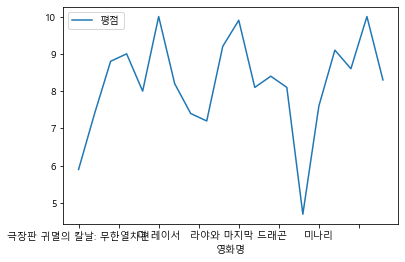

In [9]:
#3. x축을 영화명 으로 y축을 평점으로 라인차트를 그리시요
df.plot(kind='line', x='영화명', y='평점')
plt.show()

In [10]:
#4. 21.02.01 이후 개봉한 영화명,평점,개봉일을 구하시요

In [11]:
df[df['개봉일'] >= '21.02.01']

,영화명,평점,개봉일
1,카오스 워킹,7.4,21.02.24
3,톰과 제리,9.0,21.02.24
4,미션 파서블,8.0,21.02.17
5,더 레이서,10.0,21.02.24
6,고백,8.2,21.02.24
7,워 위드 그랜파,7.4,21.02.24
8,퍼펙트 케어,7.2,21.02.19
9,해리 포터와 불의 잔,9.2,21.02.10
10,라야와 마지막 드래곤,9.9,21.03.04
11,라스트 레터,8.1,21.02.24
